In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

2022_May_week4_Beuermann_Beuermann_ephemeris_lnLTT.out
2022_May_week4_Combined_Beuermann_ephemeris_fit_lnLTT.pdf
2022_May_week4_Combined_Beuermann_ephemeris_fit_lnquad.pdf
2022_May_week4_Schwope_Beuermann_ephemeris_lnquad.out
Combined_model.ipynb
Combined_model.pdf
Combined_model_fit.ipynb
interporate_lnLTT_fit_Beuermann_combined.out
interporate_lnquad_fit_combined.out


In [3]:
#Beuermann's ephemeris
T0_bjd = 48773.21461
T0_bjd_err = 0.00009
P0_day = 0.0623628426
P0_day_err = 0.0000000006

In [4]:
#Plot O-C vs BJD
InputFileInput  = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Thiswork2022/oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt"
Data   = np.genfromtxt(InputFileInput)
BJD = Data[:,3]
Epoch = (BJD - T0_bjd)/P0_day
OC_s = Data[:,4]
OC_s_err = Data[:,5]

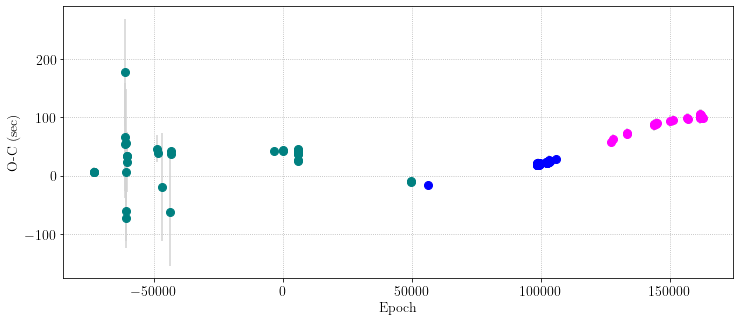

In [5]:
#Plotgraph
N_BMJD = 2400000
fig=plt.figure(figsize=(12, 5))
plt.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray')
plt.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray')
# create a line plot for the mapping function
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
#plt.xlabel('BJD-'+str(N_BMJD))
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("DP_Leo_LTT_fit_weighted_data_combined_lnsin_fit.pdf", dpi=1200)
plt.show()

In [6]:
InputFile_out = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Schwope2002_Figure7/oc_linear_Schwope2002_generated_model.txt"
Data_out   = np.genfromtxt(InputFile_out)

#Read file
BJD_time_lnquad = Data_out[:,0]
Epoch_lnquad = Data_out[:,1]
y_lnquad = Data_out[:,4]

In [7]:
InputFile_out = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Beuermann2011_Figure3/interporate_lnLTT_fit_Beuermann.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_lnLTT_Beuermann = Data_out[:,1]
Epoch_lnLTT_Beuermann = Data_out[:,4]
y_lnLTT_Beuermann = Data_out[:,5]

In [8]:
InputFile_out = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Thiswork2022/interporate_lnLTT_fit_TNO.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_lnLTT_TNO = Data_out[:,1]
Epoch_lnLTT_TNO = Data_out[:,4]
y_lnLTT_TNO = Data_out[:,5]

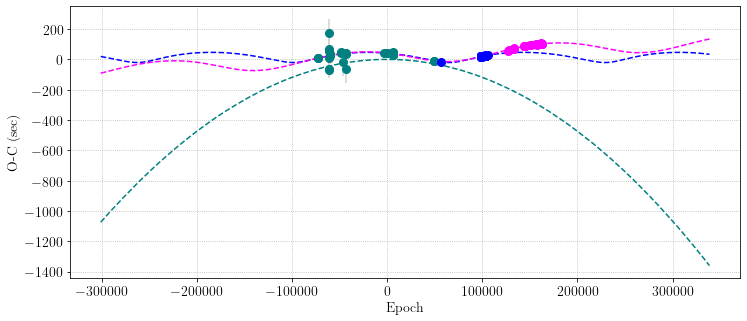

In [9]:
#Plotgraph
N_BMJD = 2400000
fig=plt.figure(figsize=(12, 5))
plt.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray')
plt.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray')
plt.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray')
plt.plot(Epoch_lnquad, y_lnquad, '--', color='teal',label='lnquad\_fit')
plt.plot(Epoch_lnLTT_Beuermann, y_lnLTT_Beuermann, '--', color='blue',label='lnLTT\_fit')
plt.plot(Epoch_lnLTT_TNO, y_lnLTT_TNO, '--', color='magenta',label='lnLTT\_fit')
# create a line plot for the mapping function
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
#plt.xlabel('BJD-'+str(N_BMJD))
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("Combined_model.pdf", dpi=1200)
plt.show()

In [10]:
InputFile_out = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Thiswork2022/2022_May_week4_TNO_Beuermann_ephemeris_lnLTT_res.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_lnLTT_TNO = Data_out[:,0]
Epoch_lnLTT_TNO_res = Data_out[:,1]
y_lnLTT_TNO_res = Data_out[:,2]
dy_lnLTT_TNO_res = Data_out[:,3]

In [11]:
InputFile_out = "/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Thiswork2022/2022_May_week4_TNO_Beuermann_ephemeris_lnLTT_Reduced_chisq.out"
Data_out   = np.genfromtxt(InputFile_out)

Reduced_chisq_lnLTT_TNO = Data_out

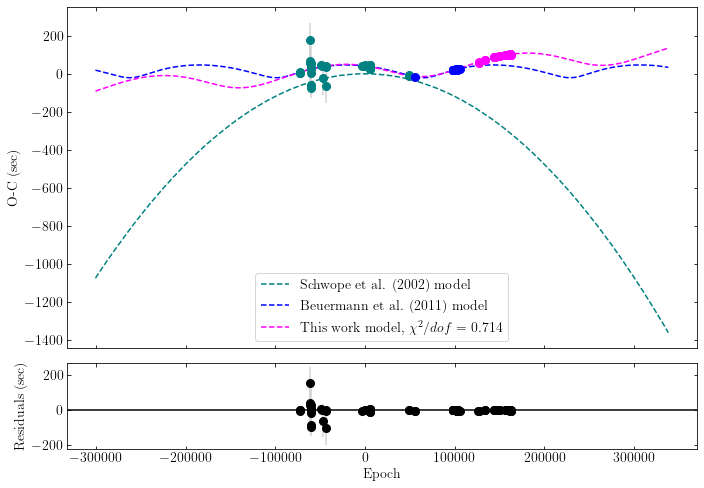

In [12]:
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, sharex=True, sharey=False, figsize=(10, 7), tight_layout=True)
plt.xlabel('Epoch')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax1.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

ax0.errorbar(Epoch[0:32], OC_s[0:32], yerr= OC_s_err[0:32], fmt='o', markersize=8, color='teal', ecolor='lightgray')
ax0.errorbar(Epoch[33:88], OC_s[33:88], yerr= OC_s_err[33:88], fmt='o', markersize=8, color='blue', ecolor='lightgray')
ax0.errorbar(Epoch[89:112], OC_s[89:112], yerr= OC_s_err[89:112], fmt='o', markersize=8, color='magenta', ecolor='lightgray')
ax0.plot(Epoch_lnquad, y_lnquad, '--', color='teal',label='Schwope et al. (2002) model')
ax0.plot(Epoch_lnLTT_Beuermann, y_lnLTT_Beuermann, '--', color='Blue',label='Beuermann et al. (2011) model')
ax0.plot(Epoch_lnLTT_TNO, y_lnLTT_TNO, '--', color='magenta',label='This work model, $\chi^{2}/dof$ = '+str('%0.3f' %(Reduced_chisq_lnLTT_TNO)))
ax0.legend(loc="best")
ax0.set_ylabel('O-C (sec)')
ax1.set_ylabel('Residuals (sec)')

#ax0.set_ylim(-800,600)


ax1.errorbar(Epoch_lnLTT_TNO_res, y_lnLTT_TNO_res, yerr= dy_lnLTT_TNO_res, fmt='o', markersize=8, color='black', ecolor='lightgray')
ax1.axhline(y=0, color='black', linestyle='-')
plt.savefig("Combined_model.pdf", dpi=1200)

plt.show()

In [13]:
pwd

'/Users/kittipongwangnok/Documents/PhD_Thesis_Analysis/NARIT_weekly_plan_2020/2022_June/2022_June_week1/Combined_model'